SUMMARY STAT- Hangning Cao

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("caribbean_ports.csv")
df.head()



,port_id,port_name,country_or_territory,region,port_type,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
0,1,Cozumel,Mexico,Western,Private,23.7406,-66.7748,187848,13.75,6,8.23,2,0.82,175.22,0.99
1,2,Costa Maya,Mexico,Western,Eco/Nature,13.4943,-65.7182,667075,13.77,3,9.74,10,0.52,100.07,0.78
2,3,Progreso,Mexico,Western,Major,18.9991,-83.1489,177948,12.11,9,8.78,3,0.69,156.40,0.44
3,4,Belize City,Belize,Western,Private,20.3673,-76.0384,452690,4.53,4,12.50,1,0.81,157.05,0.18
4,5,Roatán,Honduras,Western,Private,10.8129,-82.1033,549046,17.20,1,6.39,8,0.75,43.05,0.80


In [26]:
df.describe()
summary_stats = df.describe()
summary_stats.head()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score,cluster
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,706128.640000,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200,1.480000
std,14.57738,5.560868,7.250157,451773.228146,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461,1.073617
min,1.00000,10.096600,-84.364500,71959.000000,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000,0.000000
25%,13.25000,13.441650,-79.151925,276104.750000,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000,1.000000


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("caribbean_ports.csv")


#  Average annual visitors by country
avg_visitors_by_country = df.groupby("country_or_territory")["avg_annual_visitors"].mean().sort_values(ascending=False)
top_visitors_by_country = avg_visitors_by_country.head(5)
print(top_visitors_by_country)



country_or_territory
Sint Maarten           1.413453e+06
Venezuela              1.282310e+06
Trinidad and Tobago    1.191840e+06
Dominican Republic     1.170601e+06
Curaçao                8.631680e+05
Name: avg_annual_visitors, dtype: float64


In [32]:
#top regions by number of ports
port_count_by_region = df["region"].value_counts()
top_regions_by_port_count = port_count_by_region.head(5)
print(top_regions_by_port_count)



region
Eastern     16
Western     15
Southern    11
Bahamas      8
Name: count, dtype: int64


In [34]:
#pivot table
pivot_table = pd.pivot_table(
    df,
    values="avg_shore_spend_per_passenger",
    index="region",
    columns="port_type",
    aggfunc="mean"
)

print(pivot_table)


port_type    Boutique  Eco/Nature    Major   Private
region                                              
Bahamas    186.245000         NaN  169.630   57.4660
Eastern    128.746667     118.345  119.224   96.6700
Southern   116.062500     103.258      NaN  103.2800
Western     47.755000     130.622  117.695  130.7475


In [36]:
mean_satisfaction = df.groupby("region")["avg_customer_satisfaction"].mean().sort_values(ascending=False)
top_satisfaction = mean_satisfaction.head(5)
print(top_satisfaction)



region
Bahamas     8.380000
Eastern     8.316875
Western     8.156000
Southern    7.950909
Name: avg_customer_satisfaction, dtype: float64


Sint Maarten and Venezuela attract the highest number of visitors annually, making them ideal targets for focused marketing campaigns to boost brand visibility and tourist engagement. The Eastern and Western Caribbean regions, with the most ports, offer strategic hubs for regional promotions and cruise partnerships. The high passenger spending at Boutique ports in the Bahamas suggests a great opportunity for marketing premium experiences and upscale excursions. Additionally, with customer satisfaction highest in the Bahamas and Eastern region, marketing efforts can highlight these areas as top-rated destinations, using positive reviews to attract more travelers.

Segmentation and Targeting (20 points)

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("caribbean_ports.csv")
df.describe()


,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.055000,4.000000,8.27000,6.000000,0.790000,117.295000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.460000,6.000000,9.05000,9.000000,0.897500,163.442500,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,15.000000,12.50000,10.000000,1.200000,197.660000,0.990000


In [2]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])
#no missing value

Missing Values:
 Series([], dtype: int64)


In [4]:
#check categorical and numerical variables
print(df.dtypes)

categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Columns:", numerical_cols)


port_id                            int64
port_name                         object
country_or_territory              object
region                            object
port_type                         object
latitude                         float64
longitude                        float64
avg_annual_visitors                int64
avg_port_fee_usd                 float64
local_attractions_score            int64
avg_customer_satisfaction        float64
excursion_variety_index            int64
avg_disembark_rate               float64
avg_shore_spend_per_passenger    float64
seasonality_score                float64
dtype: object
Categorical Columns: ['port_name', 'country_or_territory', 'region', 'port_type']
Numerical Columns: ['port_id', 'latitude', 'longitude', 'avg_annual_visitors', 'avg_port_fee_usd', 'local_attractions_score', 'avg_customer_satisfaction', 'excursion_variety_index', 'avg_disembark_rate', 'avg_shore_spend_per_passenger', 'seasonality_score']


In [13]:
#apply k-means
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(df_scaled)




<ipython-input-15-bd9449967a91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='avg_customer_satisfaction', palette='Set3')


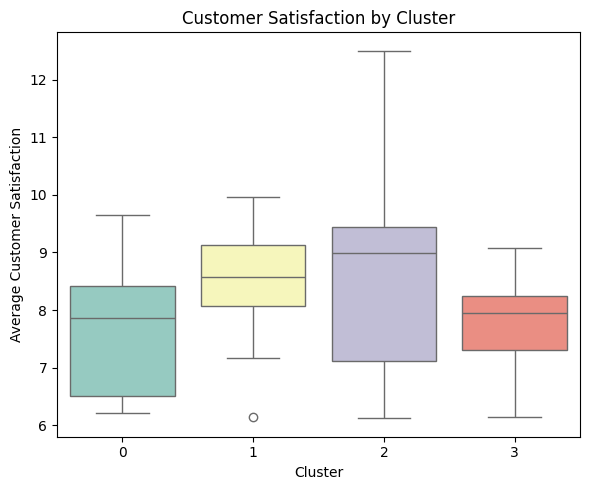

In [15]:
#visualization
# box plot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='cluster', y='avg_customer_satisfaction', palette='Set3')
plt.title('Customer Satisfaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Customer Satisfaction')
plt.tight_layout()
plt.show()


cluster 2 have the highest overall satisfaction on average, it also have some large outliners.
Cluster 1 also have high median satisfaction. Cluster 0 and 3 have low median satisfaction, espically cluster 0. Cluster 0 is more skewed, which is less than 8.
We could see that 2 have high outliners and 3 have low outliners.

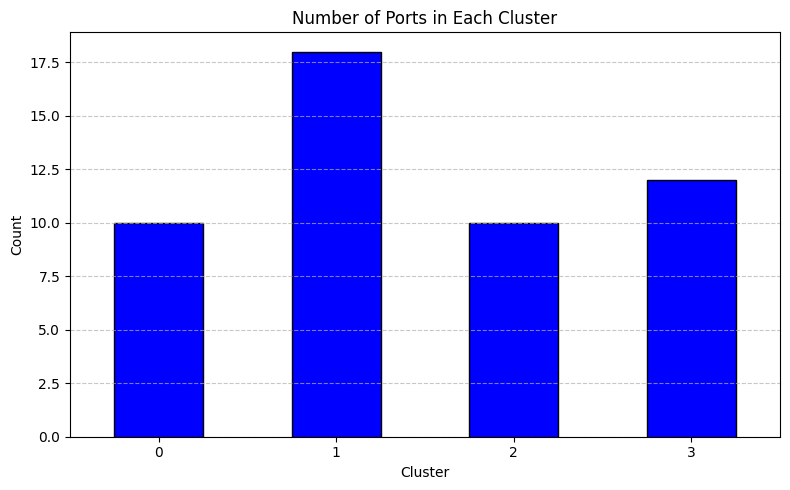

In [17]:
# bar plot
plt.figure(figsize=(8, 5))
df['cluster'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Ports in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Cluster 1 have the most number of ports. 0 and 2 have the same.

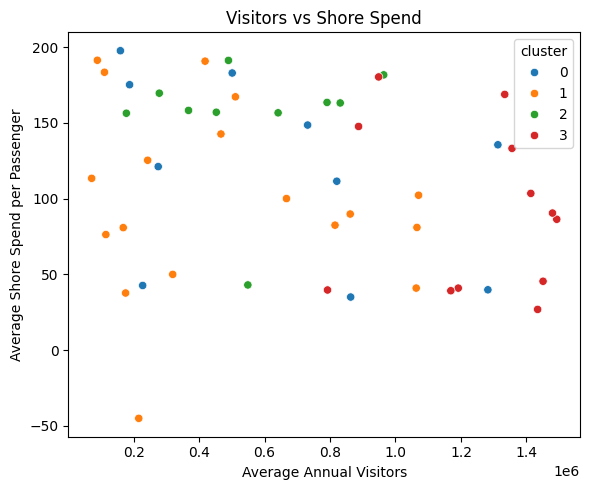

In [22]:
# scatterplot
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='avg_annual_visitors',
    y='avg_shore_spend_per_passenger',
    hue='cluster',
    palette='tab10'
)
plt.title('Visitors vs Shore Spend')
plt.xlabel('Average Annual Visitors')
plt.ylabel('Average Shore Spend per Passenger')
plt.tight_layout()
plt.show()




The scatter plot reveals no strong linear relationship between average annual visitors and average shore spend per passenger, suggesting that ports with more visitors don't necessarily generate higher spending, and spending behavior is likely influenced by other factors.

cluster 0:  – Popular but Low-Spending Ports:  
  These ports get lots of visitors but people don’t spend much money when they arrive. But these ports is really popular amoung customer
Cluster 1 – median Ports: Ports that do well overall, with good visitor numbers, spending, and satisfaction.
Cluster 2 – High-End Ports: customer willing to spend a lot money on it. people are very satisfied with their experience.
Cluster 3 – Busy but Struggling Ports: These ports are very crowded but have low spending and lower satisfaction.

I think lobster land should focus more on cluster 1. We can see that these cluster have the most people and with moderate customer satisfaction, this is not the most expensive one nor the most cost-effective one, but it can fit everyone the most.

Also lobster land should prioritize cluster 3 and 0 where those spending have the greatest opportunity to growth, lobster land can set up plans to boost customers.